# **EEE3094S LAB 1**
## Nyiko Mathebula
## MTHNYI011



## **1.Step Test**
### **1.1 Data Collection**

A step input of magnitude '1' was applied to the system and data was recorded and plotted as shown below:
 

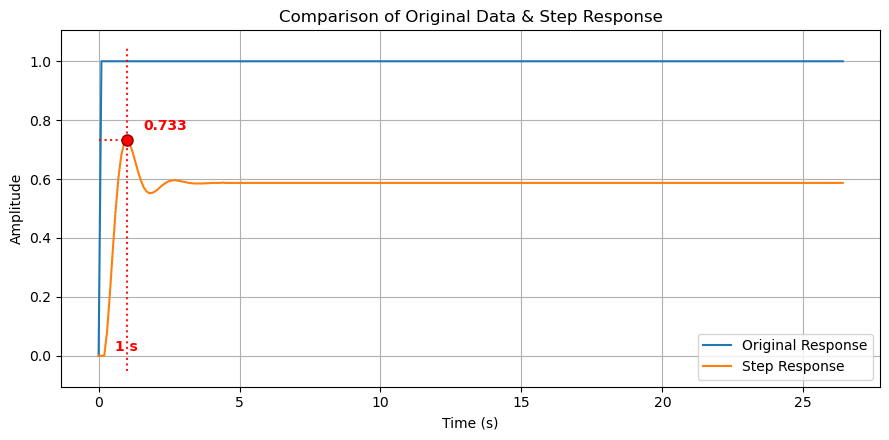

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, step

# 1. Loading the Data
data = pd.read_csv('Data/F34BSuspensionTestData-Part 1 Test 1.CSV')
time = data['Time(s)'].values
input_signal = data['Input'].values  

# Modifying the output and time data so that they start at zero
first_output_value = data['Output_Displacement'].values[0]
output_displacement = data['Output_Displacement'].values - first_output_value

first_time_value = time[0]
time = time - first_time_value

# 2. Finding peak of step response (for annotation)
peak_idx = int(np.argmax(output_displacement))
peak_time = float(time[peak_idx])
peak_value = float(output_displacement[peak_idx])

# --- Plotting with vertical/horizontal dotted red lines & labels ---
fig, ax = plt.subplots(figsize=(9, 4.5))

ax.plot(time, input_signal, label="Original Response")
ax.plot(time, output_displacement, label="Step Response")

# Force a draw so autoscale limits are known
plt.draw()
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()

# Red dotted style
red_style = dict(color='red', linestyle=':', linewidth=1.5, alpha=0.9)

# Vertical dotted line at peak_time spanning full y-range
ax.vlines(peak_time, ymin=ymin, ymax=ymax, **red_style)

# Horizontal dotted line at peak_value from time[0] to peak_time
ax.hlines(peak_value, xmin=time[0], xmax=peak_time, **red_style)

# Marking the peak point
ax.plot(peak_time, peak_value, 'o', markersize=8, markeredgecolor='darkred', markerfacecolor='red', zorder=6)

# Labelling the peak magnitude near the marker (slight offset to the right)
x_label_offset = (xmax - xmin) * 0.02
y_label_offset = (ymax - ymin) * 0.02
ax.text(peak_time + x_label_offset, peak_value + y_label_offset,
        f'{peak_value:.3g}', color='red', fontsize=10, fontweight='bold',
        horizontalalignment='left', verticalalignment='bottom')

# Labelling the peak time at the bottom (near x-axis)
ax.text(peak_time, ymin + 0.05*(ymax - ymin),
        f'{peak_time:.3g} s', color='red', fontsize=10, fontweight='bold',
        horizontalalignment='center', verticalalignment='bottom')

ax.set_title('Comparison of Original Data & Step Response')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()




---

### **1.2 Step Data Analysis**

The step response shows a clear overshoot and damped oscillations, indicating an **underdamped second-order system**. The standard model is:

$$
G(s) = \frac{A \omega_n^2}{s^2 + 2\zeta \omega_n s + \omega_n^2}
$$

#### 1. **Steady-State Gain**

Final value from the step response:

$$
A = y_{ss} \approx 0.587
$$

#### 2. **Percent Overshoot**

Peak value $y_{\text{peak}} = 0.733$:

$$
\text{PO} \approx 24.9\%
$$

#### 3. **Damping Ratio**

From PO:

$$
\zeta \approx 0.404
$$

#### 4. **Natural Frequency**

Using peak time $t_p \approx 1.0\ \text{s}$:

$$
\omega_n \approx 3.43\ \text{rad/s}
$$

#### 5. **Transfer Function**

$$
G(s) = \frac{6.91}{s^2 + 2.77s + 11.76}, \quad
\text{Poles: } s = -1.385 \pm j3.137
$$

---

**Summary:**
The system has a **gain of 0.587**, **24.9% overshoot**, **damping ratio of 0.404**, and **natural frequency of 3.43 rad/s**. The transfer function confirms complex conjugate poles, verifying the system is underdamped.

---


## **2.Frequency Response Test**

## **2.1 Data Collection**

Different sinusoidal inputs with an amplitude of 1 were applied to the system. To assess the system's response, we calculated both the gain and phase. Here's how they were determined:

**Gain**:  
$$ \text{Gain (dB)} = 20 \log\left(\frac{\text{Output Amplitude}}{\text{Input Amplitude}}\right) $$

**Phase**: 


$$ \Delta \phi = \left( \frac{\Delta t}{T} \right) \times 360^\circ $$
Where **T** is the period of the sinusoid

The gain and phase data was then used to plot bode plot as shown below:


f=0.01 rad/s: Rin=1.0000, Rout=0.5870, mag=0.5870, mag_dB=-4.6273, phase_rad=-0.0030 rad, res_out_std=2.8746e-04
f=0.05 rad/s: Rin=1.0000, Rout=0.5871, mag=0.5871, mag_dB=-4.6263, phase_rad=-0.0152 rad, res_out_std=2.8473e-04
f=0.10 rad/s: Rin=1.0000, Rout=0.5872, mag=0.5872, mag_dB=-4.6241, phase_rad=-0.0305 rad, res_out_std=2.8602e-04
f=0.15 rad/s: Rin=1.0000, Rout=0.5875, mag=0.5875, mag_dB=-4.6194, phase_rad=-0.0457 rad, res_out_std=2.9421e-04
f=0.20 rad/s: Rin=1.0000, Rout=0.5880, mag=0.5880, mag_dB=-4.6129, phase_rad=-0.0610 rad, res_out_std=2.8530e-04
f=0.25 rad/s: Rin=1.0000, Rout=0.5885, mag=0.5885, mag_dB=-4.6048, phase_rad=-0.0762 rad, res_out_std=2.7673e-04
f=0.30 rad/s: Rin=1.0000, Rout=0.5892, mag=0.5892, mag_dB=-4.5954, phase_rad=-0.0916 rad, res_out_std=2.8195e-04
f=0.40 rad/s: Rin=1.0000, Rout=0.5909, mag=0.5909, mag_dB=-4.5702, phase_rad=-0.1224 rad, res_out_std=2.8498e-04
f=0.50 rad/s: Rin=1.0000, Rout=0.5930, mag=0.5930, mag_dB=-4.5387, phase_rad=-0.1534 rad, res_ou

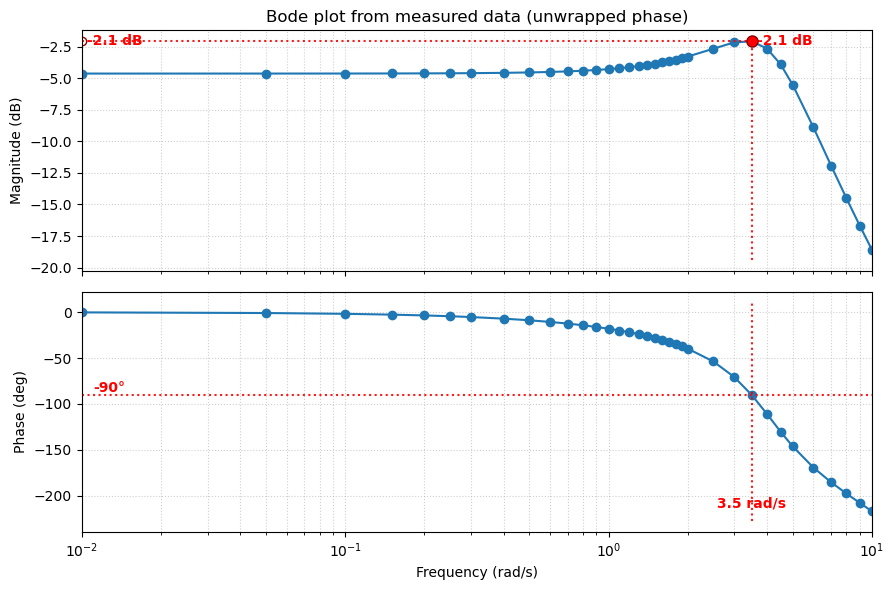

In [2]:

# Computing Bode (magnitude & phase) from many CSV runs (sinusoidal steady-state).
# Enhanced with visual indicators for peak magnitude and -90° phase reference.
#
# Author: Nyiko Mathebula
# Date:   2025-09-01

import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

# -------------------- USER SETTINGS --------------------
data_folder = "Data"   # folder where your CSVs are located
# Frequencies you measured (rad/s)
frequencies = [0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
               1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.5,3.0,3.5,
               4.0,4.5,5.0,6.0,7.0,8.0,9.0,10.0]
transient_cycles = 5    # number of cycles to discard at start (tune if needed)
min_points_for_fit = 30 # require at least this many steady-state samples
output_csv = "Bode_Plots_Data.csv"
output_png = "Frequency_Responce_Bode_Plots.png"
# -------------------------------------------------------

def find_file_for_freq(freq, folder):
    # attempting several plausible filename patterns
    candidates = [
        f"F34B5uspensionTestData Part 2 Test {freq:.2f} rad.CSV",
        f"F34B5uspensionTestData Part 2 Test {freq:.2g} rad.CSV",
        f"F34BSuspensionTestData Part 2 Test {freq:.2f} rad.CSV",
        f"F34B5uspensionTestData Part2 Test {freq:.2f} rad.CSV",
        f"F34B5uspensionTestData Part 2 Test {freq:.2f}rad.CSV",
    ]
    for c in candidates:
        path = os.path.join(folder, c)
        if os.path.exists(path):
            return path
    # fallback: glob any file that contains the frequency string
    # trying two formats (.2f and .2g and .1f)
    freqstrs = [f"{freq:.2f}", f"{freq:.2g}", f"{freq:.1f}"]
    for fs in freqstrs:
        matches = glob.glob(os.path.join(folder, f"*{fs}*.CSV")) + glob.glob(os.path.join(folder, f"*{fs}*.csv"))
        if matches:
            return matches[0]
    return None

def load_csv_flexible(path):
    # Read CSV robustly
    df = pd.read_csv(path, header=0)
    cols = df.columns.tolist()
    # candidate names for columns
    possible_time = ['Time(s)','Time (s)','Time','time','time(s)','Time_s','Time (s) ']
    possible_input = ['Input',' input','Input ','In','InputSignal','Input (V)','Vin']
    possible_output = ['Output_Displacement','Output Displacement','Output','Output_Displacement ','Output_Displacement','Y','y','Disp']
    def find_col(possible):
        for c in possible:
            if c in df.columns:
                return c
        # try case-insensitive match
        lc_possible = [p.strip().lower() for p in possible]
        for col in df.columns:
            if col.strip().lower() in lc_possible:
                return col
        return None
    time_col = find_col(possible_time) or cols[0]
    input_col = find_col(possible_input) or (cols[1] if len(cols)>1 else cols[0])
    output_col = find_col(possible_output) or (cols[2] if len(cols)>2 else cols[-1])
    time = df[time_col].astype(float).values
    input_signal = df[input_col].astype(float).values
    output_displacement = df[output_col].astype(float).values
    return time, input_signal, output_displacement

def fit_sine_least_squares(t, y, omega):
    """
    Fit y(t) = a*sin(omega*t) + b*cos(omega*t) + c  (linear LS)
    Return amplitude R, phase phi (radians), offset c, residual std
    Phase phi is defined such that y ~ R*sin(omega*t + phi)
    """
    S = np.sin(omega*t)
    C = np.cos(omega*t)
    X = np.column_stack([S, C, np.ones_like(t)])
    theta, *_ = np.linalg.lstsq(X, y, rcond=None)
    a, b, c = theta
    R = np.sqrt(a*a + b*b)
    # phi such that a = R*cos(phi), b = R*sin(phi)
    phi = np.arctan2(b, a)
    y_fit = X.dot(theta)
    res_std = np.std(y - y_fit)
    return R, phi, c, res_std

# ----------------- MAIN PROCESSING -----------------
freqs_collected = []
mags_collected = []
mags_dB_collected = []
phase_rads_list = []  
residuals_in = []
residuals_out = []

for f in frequencies:
    path = find_file_for_freq(f, data_folder)
    if path is None:
        print(f"[WARN] file for frequency {f} rad/s not found; skipping.")
        continue
    try:
        time, input_signal, output_displacement = load_csv_flexible(path)
    except Exception as e:
        print(f"[ERROR] Could not read {path}: {e}")
        continue

    # Keeping original variable names: zero-adjusted
    output_displacement = output_displacement - output_displacement[0]
    time = time - time[0]

    omega = float(f)
    if omega <= 0:
        print(f"[WARN] skipping non-positive frequency {f}")
        continue

    T = 2*np.pi/omega
    t_start_ss = time[0] + transient_cycles * T
    mask = time >= t_start_ss
    t_ss = time[mask]
    in_ss = input_signal[mask]
    out_ss = output_displacement[mask]

    # fallback if not enough points left
    if len(t_ss) < min_points_for_fit:
        t_ss = time[len(time)//2:]
        in_ss = input_signal[len(time)//2:]
        out_ss = output_displacement[len(time)//2:]
        if len(t_ss) < min_points_for_fit:
            print(f"[WARN] Not enough steady-state points for f={f} rad/s (only {len(t_ss)}). Skipping.")
            continue

    # Fit sinusoids to input & output (least squares)
    R_in, phi_in, off_in, res_in = fit_sine_least_squares(t_ss, in_ss, omega)
    R_out, phi_out, off_out, res_out = fit_sine_least_squares(t_ss, out_ss, omega)

    # magnitude ratio and raw phase difference (radians)
    mag = np.nan
    if R_in != 0:
        mag = R_out / R_in
    # safely computing dB
    mag_db = 20*np.log10(np.abs(mag)) if (np.isfinite(mag) and mag>0) else -np.inf
    phase_rad = phi_out - phi_in

    # storing results
    freqs_collected.append(omega)
    mags_collected.append(mag)
    mags_dB_collected.append(mag_db)
    phase_rads_list.append(phase_rad)
    residuals_in.append(res_in)
    residuals_out.append(res_out)

    print(f"f={f:.2f} rad/s: Rin={R_in:.4f}, Rout={R_out:.4f}, mag={mag:.4f}, mag_dB={mag_db:.4f}, phase_rad={phase_rad:.4f} rad, res_out_std={res_out:.4e}")

# Check collected length
if len(freqs_collected) == 0:
    raise SystemExit("No frequencies processed. Check data folder and filenames.")

# Sort by frequency (in case any were out of order)
idx = np.argsort(freqs_collected)
freqs = np.array(freqs_collected)[idx]
mags = np.array(mags_collected)[idx]
mags_dB = np.array(mags_dB_collected)[idx]
phase_rads = np.array(phase_rads_list)[idx]
residuals_in = np.array(residuals_in)[idx]
residuals_out = np.array(residuals_out)[idx]

# Unwrap phase (radians) across frequency to remove 2*pi jumps
phase_rads_unwrapped = np.unwrap(phase_rads)

# Convert unwrapped radians to degrees for reporting/plotting
phases_deg_unwrapped = np.degrees(phase_rads_unwrapped)

# shift the phase so the maximum phase <= 0 deg (
phases_deg_plot = phases_deg_unwrapped.copy()
# ensure the maximum phase is <= 0
while np.max(phases_deg_plot) > 0:
    phases_deg_plot -= 360

# Find the peak magnitude (highest point)
# handle case where all mags_dB are -inf
if np.all(np.isneginf(mags_dB)):
    raise SystemExit("All magnitudes are -inf (likely zero or invalid).")
peak_idx = np.nanargmax(mags_dB)
peak_freq = freqs[peak_idx]
peak_mag_dB = mags_dB[peak_idx]
peak_phase_deg = phases_deg_plot[peak_idx]

print(f"[INFO] Peak magnitude: {peak_mag_dB:.2f} dB at {peak_freq:.2f} rad/s")

# Saving numeric results
out_table = pd.DataFrame({
    'freq_rad_s': freqs,
    'mag_linear': mags,
    'mag_dB': mags_dB,
    'phase_deg_unwrapped': phases_deg_unwrapped,
    'phase_deg_plot': phases_deg_plot,
    'residual_out_std': residuals_out
})
out_table.to_csv(output_csv, index=False)
print(f"[INFO] Saved numeric estimates to {output_csv}")

# Plotting Bode (magnitude and phase) with visual indicators
plt.rcParams.update({'font.size': 10})
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

# Magnitude subplot
ax1.semilogx(freqs, mags_dB, 'o-', linewidth=1.5, markersize=6, label='Magnitude')
ax1.grid(which='both', linestyle=':', alpha=0.6)
ax1.set_ylabel('Magnitude (dB)')
ax1.set_title('Bode plot from measured data (unwrapped phase)')

# Phase subplot
ax2.semilogx(freqs, phases_deg_plot, 'o-', linewidth=1.5, markersize=6, label='Phase')
ax2.grid(which='both', linestyle=':', alpha=0.6)
ax2.set_xlabel('Frequency (rad/s)')
ax2.set_ylabel('Phase (deg)')

# Force a draw so that autoscale limits are computed
plt.draw()

# Get y-limits for each axis (after plotting)
mag_ylim = ax1.get_ylim()
phase_ylim = ax2.get_ylim()

# ----------------- Enhanced red dotted indicators -----------------
red_style = dict(color='red', linestyle=':', linewidth=1.5, alpha=0.9)

# 1) Vertical dotted line at peak_freq: draw on both axes so it visually passes through entire figure.
# On mag axis: from peak magnitude down to bottom of mag plot
ax1.vlines(peak_freq, ymin=mag_ylim[0], ymax=peak_mag_dB, **red_style)
# Mark the peak point
ax1.plot(peak_freq, peak_mag_dB, 'o', markersize=8, markeredgecolor='darkred',
         markerfacecolor='red', zorder=5)

# On phase axis: full vertical line (top to bottom)
ax2.vlines(peak_freq, ymin=phase_ylim[0], ymax=phase_ylim[1], **red_style)

# 1a) Label the vertical line at the top (near the peak magnitude)
# Place label slightly to the right of the vertical line, vertically centered at the peak magnitude
ax1.text(peak_freq * 1.05, peak_mag_dB, f'{peak_mag_dB:.1f} dB', color='red',
         fontsize=10, fontweight='bold', horizontalalignment='left', verticalalignment='center')

# 1b) Label the vertical line at the bottom (frequency label) on the phase axis (so it sits near the x-axis)
ax2.text(peak_freq, phase_ylim[0] + 0.05*(phase_ylim[1]-phase_ylim[0]),
         f'{peak_freq:.2g} rad/s', color='red', fontsize=10, fontweight='bold',
         horizontalalignment='center', verticalalignment='bottom')

# 2) Horizontal dotted line from freqs[0] to peak_freq at peak magnitude (on magnitude plot)
ax1.hlines(peak_mag_dB, xmin=freqs[0], xmax=peak_freq, **red_style)
# Placing a marker at the left end for clarity
ax1.plot(freqs[0], peak_mag_dB, 'o', markersize=6, markeredgecolor='darkred', markerfacecolor='none')

# 3) Horizontal dotted line at -90° on the phase plot, labeled at start (freqs[0])
ax2.hlines(-90.0, xmin=freqs[0], xmax=freqs[-1], **red_style)
ax2.text(freqs[0]*1.1, -90.0, '-90°', color='red', fontsize=10, fontweight='bold',
         verticalalignment='bottom')

# Magnitude label near left side of mag plot (mirrors previous behavior)
ax1.text(freqs[0] * 1.05, peak_mag_dB, f'{peak_mag_dB:.1f} dB', color='red',
         fontsize=10, fontweight='bold', verticalalignment='center')

# Final touches
ax1.set_xscale('log')  # ensure log scale
ax2.set_xscale('log')
ax1.set_xlim(left=freqs[0], right=freqs[-1])
ax2.set_xlim(left=freqs[0], right=freqs[-1])

plt.tight_layout()
plt.savefig(output_png, dpi=300, bbox_inches='tight')
print(f"[INFO] Saved enhanced Bode plot to {output_png}")
plt.show()



---

### **2.2 Results**

The Bode plots above show:

* DC gain at about **–4.6 dB** (flat at low frequencies).
* A resonance peak at **ω ≈ 3.5 rad/s** with **–2.16 dB** magnitude.
* Phase crossing **–90°** near the same frequency, consistent with an underdamped second-order system.

---

### **2.3 Calculations**

From the plots:

* Gain:

  $$
  A \approx 0.589
  $$
* Natural frequency:

  $$
  \omega_n \approx 3.5 \,\text{rad/s}
  $$
* Resonant peak ratio:

  $$
  R \approx 1.324
  $$
* Damping ratio:

  $$
  \zeta \approx 0.415
  $$

---

### **2.4 Estimated Transfer Function**

$$
F(s) = \frac{7.22}{s^2 + 2.91s + 12.25}, \quad 
\text{Poles: } s = -1.455 \pm j3.183
$$

---

### **2.5 Discussion**

The frequency response agrees with the step response results. Both confirm the system is a **second-order underdamped system** with complex poles and a clear resonance peak.



---


---

### **3. System Model**

Models from the step and frequency tests give the following transfer functions:

$$
G(s) = \frac{6.91}{s^2 + 2.77s + 11.76}, \quad 
F(s) = \frac{7.22}{s^2 + 2.91s + 12.25}
$$

---

### **3.1 Comparison of Results**

| Parameter                    | Step Test $G(s)$ | Frequency Test $F(s)$ | Average    |
| ---------------------------- | ---------------- | --------------------- | ---------- |
| DC Gain $A$                  | 0.587            | 0.589                 | 0.588      |
| Damping Ratio $\zeta$        | 0.404            | 0.415                 | 0.410      |
| Natural Frequency $\omega_n$ | 3.43 rad/s       | 3.50 rad/s            | 3.47 rad/s |

---

### **3.2 Proposed Transfer Function**

Averaging the parameters gives:

$$
X(s) = \frac{7.08}{s^2 + 2.85s + 12.04}, \quad
\text{Poles: } s = -1.425 \pm j3.160
$$

---

### **3.3 Discussion**

Both tests show close agreement (within 3%), confirming the accuracy of the identification. The proposed model $X(s)$ represents a balanced and reliable estimate of the system dynamics.

---


## **4.Validation**

### **4.1 Step Response Validation**


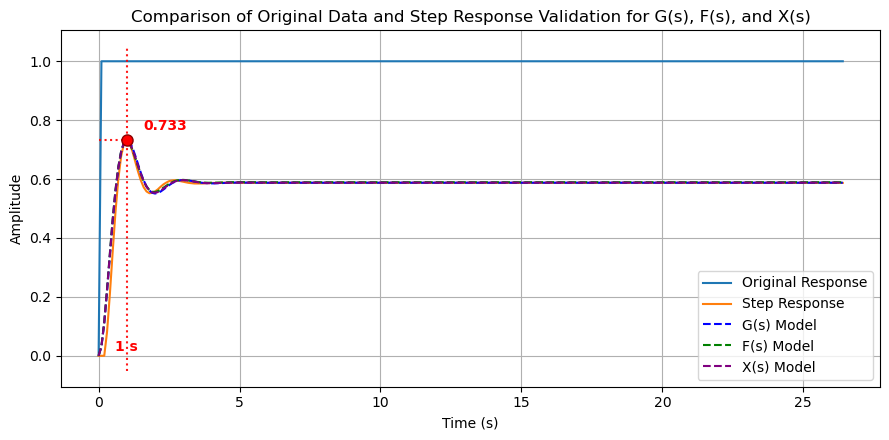

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, step

# 1. Load the Data
data = pd.read_csv('Data/F34BSuspensionTestData-Part 1 Test 1.CSV')
time = data['Time(s)'].values
input_signal = data['Input'].values  

# Modify the output and time data so that they start at zero
first_output_value = data['Output_Displacement'].values[0]
output_displacement = data['Output_Displacement'].values - first_output_value

first_time_value = time[0]
time = time - first_time_value

# 2. Find peak of step response (for annotation)
peak_idx = int(np.argmax(output_displacement))
peak_time = float(time[peak_idx])
peak_value = float(output_displacement[peak_idx])

# --- Plotting with vertical/horizontal dotted red lines & labels ---
fig, ax = plt.subplots(figsize=(9, 4.5))

ax.plot(time, input_signal, label="Original Response")
ax.plot(time, output_displacement, label="Step Response")

# Force a draw so autoscale limits are known
plt.draw()
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()

# Red dotted style
red_style = dict(color='red', linestyle=':', linewidth=1.5, alpha=0.9)

# Vertical dotted line at peak_time spanning full y-range
ax.vlines(peak_time, ymin=ymin, ymax=ymax, **red_style)

# Horizontal dotted line at peak_value from time[0] to peak_time
ax.hlines(peak_value, xmin=time[0], xmax=peak_time, **red_style)

# Mark the peak point
ax.plot(peak_time, peak_value, 'o', markersize=8, markeredgecolor='darkred', markerfacecolor='red', zorder=6)

# Label the peak magnitude near the marker (slight offset to the right)
x_label_offset = (xmax - xmin) * 0.02
y_label_offset = (ymax - ymin) * 0.02
ax.text(peak_time + x_label_offset, peak_value + y_label_offset,
        f'{peak_value:.3g}', color='red', fontsize=10, fontweight='bold',
        horizontalalignment='left', verticalalignment='bottom')

# Label the peak time at the bottom (near x-axis)
ax.text(peak_time, ymin + 0.05*(ymax - ymin),
        f'{peak_time:.3g} s', color='red', fontsize=10, fontweight='bold',
        horizontalalignment='center', verticalalignment='bottom')

# ======================================================
# ADD VALIDATION TRANSFER FUNCTIONS G(s), F(s), X(s)
# ======================================================
# Define transfer functions (numerator, denominator)
G = TransferFunction([6.91], [1, 2.77, 11.76])
F = TransferFunction([7.22], [1, 2.91, 12.25])
X = TransferFunction([7.08], [1, 2.85, 12.04])

# Compute step responses using the same time vector
tG, yG = step(G, T=time)
tF, yF = step(F, T=time)
tX, yX = step(X, T=time)

# Plot them
ax.plot(tG, yG, label="G(s) Model", linestyle="--", color="blue")
ax.plot(tF, yF, label="F(s) Model", linestyle="--", color="green")
ax.plot(tX, yX, label="X(s) Model", linestyle="--", color="purple")

# ======================================================

ax.set_title('Comparison of Original Data and Step Response Validation for G(s), F(s), and X(s)')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


---

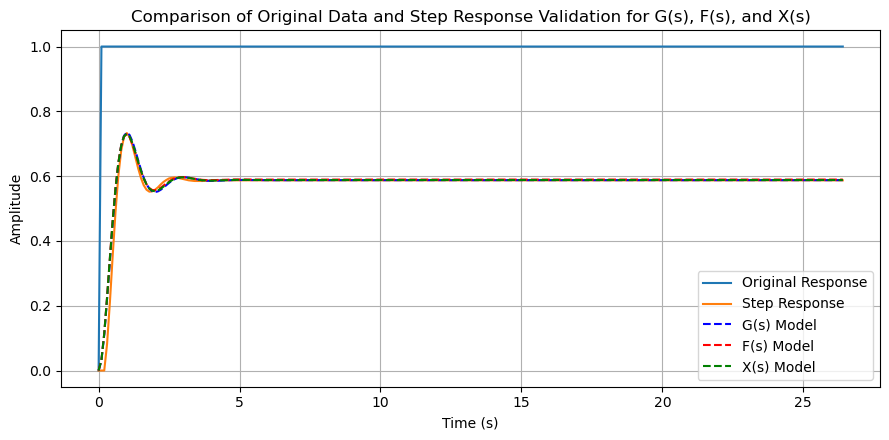

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, step

# 1. Loading the Data
data = pd.read_csv('Data/F34BSuspensionTestData-Part 1 Test 1.CSV')
time = data['Time(s)'].values
input_signal = data['Input'].values  

# Modifying the output and time data so that they start at zero
first_output_value = data['Output_Displacement'].values[0]
output_displacement = data['Output_Displacement'].values - first_output_value

first_time_value = time[0]
time = time - first_time_value

# --- Plotting (without peak annotation lines) ---
fig, ax = plt.subplots(figsize=(9, 4.5))

ax.plot(time, input_signal, label="Original Response")
ax.plot(time, output_displacement, label="Step Response")

# ======================================================
# ADD VALIDATION TRANSFER FUNCTIONS G(s), F(s), X(s)
# ======================================================
# Define transfer functions (numerator, denominator)
G = TransferFunction([6.91], [1, 2.77, 11.76])
F = TransferFunction([7.22], [1, 2.91, 12.25])
X = TransferFunction([7.08], [1, 2.85, 12.04])

# Compute step responses using the same time vector
tG, yG = step(G, T=time)
tF, yF = step(F, T=time)
tX, yX = step(X, T=time)

# Plot them
ax.plot(tG, yG, label="G(s) Model", linestyle="--", color="blue")
ax.plot(tF, yF, label="F(s) Model", linestyle="--", color="red")
ax.plot(tX, yX, label="X(s) Model", linestyle="--", color="green")

# ======================================================

ax.set_title('Comparison of Original Data and Step Response Validation for G(s), F(s), and X(s)')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


---

### **Analysis for Step Response Validation**

The step responses of $G(s)$, $F(s)$ and $X(s)$ were compared with the experimental data. All models accurately captured the system dynamics, including overshoot and settling behavior, confirming the **underdamped second-order nature** of the system.

Both $G(s)$ and $F(s)$ aligned closely with the experimental response, validating the calculations from the step and frequency tests. The averaged model $X(s)$ also matched well, confirming it as a reliable representation of the system.

---


### **4.2 : Frequency Response Validation**

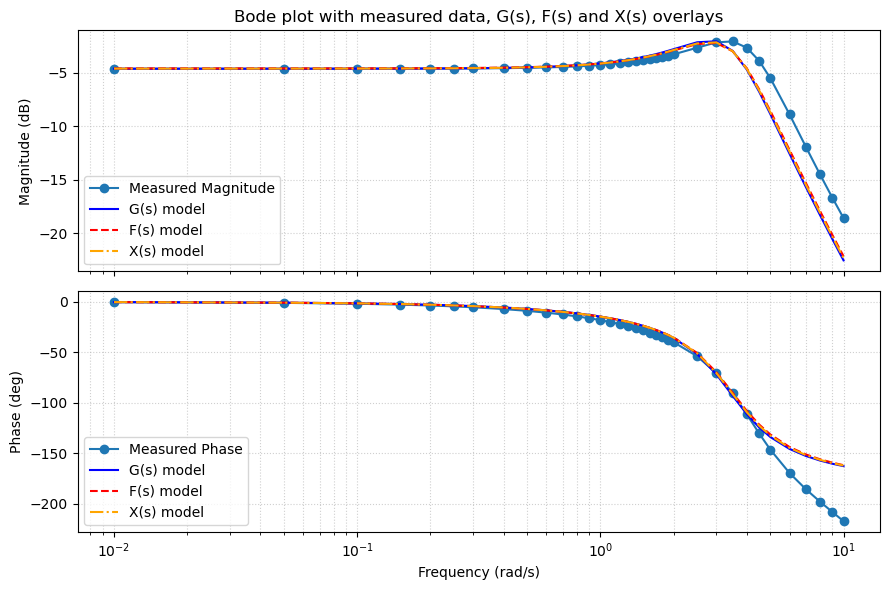

[INFO] Saved combined Bode plot with models to Frequency_Responce_Bode_Plots.png


In [5]:

# Computing Bode (magnitude & phase) from many CSV runs (sinusoidal steady-state).
# with visual indicators + overlay of G(s), F(s) and X(s).
#
# Author: Nyiko Mathebula
# Date:   2025-09-03

import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from scipy import signal

# -------------------- USER SETTINGS --------------------
data_folder = "Data"   # folder where your CSVs are located
frequencies = [0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
               1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.5,3.0,3.5,
               4.0,4.5,5.0,6.0,7.0,8.0,9.0,10.0]
transient_cycles = 5
min_points_for_fit = 30
output_csv = "Bode_Plots_Data.csv"
output_png = "Frequency_Responce_Bode_Plots.png"
# -------------------------------------------------------

def find_file_for_freq(freq, folder):
    candidates = [
        f"F34B5uspensionTestData Part 2 Test {freq:.2f} rad.CSV",
        f"F34B5uspensionTestData Part 2 Test {freq:.2g} rad.CSV",
        f"F34BSuspensionTestData Part 2 Test {freq:.2f} rad.CSV",
        f"F34B5uspensionTestData Part2 Test {freq:.2f} rad.CSV",
        f"F34B5uspensionTestData Part 2 Test {freq:.2f}rad.CSV",
    ]
    for c in candidates:
        path = os.path.join(folder, c)
        if os.path.exists(path):
            return path
    freqstrs = [f"{freq:.2f}", f"{freq:.2g}", f"{freq:.1f}"]
    for fs in freqstrs:
        matches = glob.glob(os.path.join(folder, f"*{fs}*.CSV")) + glob.glob(os.path.join(folder, f"*{fs}*.csv"))
        if matches:
            return matches[0]
    return None

def load_csv_flexible(path):
    df = pd.read_csv(path, header=0)
    cols = df.columns.tolist()
    possible_time = ['Time(s)','Time (s)','Time','time','time(s)','Time_s','Time (s) ']
    possible_input = ['Input',' input','Input ','In','InputSignal','Input (V)','Vin']
    possible_output = ['Output_Displacement','Output Displacement','Output','Output_Displacement ','Output_Displacement','Y','y','Disp']
    def find_col(possible):
        for c in possible:
            if c in df.columns:
                return c
        lc_possible = [p.strip().lower() for p in possible]
        for col in df.columns:
            if col.strip().lower() in lc_possible:
                return col
        return None
    time_col = find_col(possible_time) or cols[0]
    input_col = find_col(possible_input) or (cols[1] if len(cols)>1 else cols[0])
    output_col = find_col(possible_output) or (cols[2] if len(cols)>2 else cols[-1])
    time = df[time_col].astype(float).values
    input_signal = df[input_col].astype(float).values
    output_displacement = df[output_col].astype(float).values
    return time, input_signal, output_displacement

def fit_sine_least_squares(t, y, omega):
    S = np.sin(omega*t)
    C = np.cos(omega*t)
    X = np.column_stack([S, C, np.ones_like(t)])
    theta, *_ = np.linalg.lstsq(X, y, rcond=None)
    a, b, c = theta
    R = np.sqrt(a*a + b*b)
    phi = np.arctan2(b, a)
    y_fit = X.dot(theta)
    res_std = np.std(y - y_fit)
    return R, phi, c, res_std

# ----------------- MAIN PROCESSING -----------------
freqs_collected = []
mags_collected = []
mags_dB_collected = []
phase_rads_list = []
residuals_in = []
residuals_out = []

for f in frequencies:
    path = find_file_for_freq(f, data_folder)
    if path is None:
        print(f"[WARN] file for frequency {f} rad/s not found; skipping.")
        continue
    try:
        time, input_signal, output_displacement = load_csv_flexible(path)
    except Exception as e:
        print(f"[ERROR] Could not read {path}: {e}")
        continue

    output_displacement = output_displacement - output_displacement[0]
    time = time - time[0]

    omega = float(f)
    if omega <= 0:
        continue

    T = 2*np.pi/omega
    t_start_ss = time[0] + transient_cycles * T
    mask = time >= t_start_ss
    t_ss = time[mask]
    in_ss = input_signal[mask]
    out_ss = output_displacement[mask]

    if len(t_ss) < min_points_for_fit:
        t_ss = time[len(time)//2:]
        in_ss = input_signal[len(time)//2:]
        out_ss = output_displacement[len(time)//2:]
        if len(t_ss) < min_points_for_fit:
            continue

    R_in, phi_in, off_in, res_in = fit_sine_least_squares(t_ss, in_ss, omega)
    R_out, phi_out, off_out, res_out = fit_sine_least_squares(t_ss, out_ss, omega)

    mag = np.nan
    if R_in != 0:
        mag = R_out / R_in
    mag_db = 20*np.log10(np.abs(mag)) if (np.isfinite(mag) and mag>0) else -np.inf
    phase_rad = phi_out - phi_in

    freqs_collected.append(omega)
    mags_collected.append(mag)
    mags_dB_collected.append(mag_db)
    phase_rads_list.append(phase_rad)
    residuals_in.append(res_in)
    residuals_out.append(res_out)

# Process arrays
idx = np.argsort(freqs_collected)
freqs = np.array(freqs_collected)[idx]
mags = np.array(mags_collected)[idx]
mags_dB = np.array(mags_dB_collected)[idx]
phase_rads = np.array(phase_rads_list)[idx]
phase_rads_unwrapped = np.unwrap(phase_rads)
phases_deg_unwrapped = np.degrees(phase_rads_unwrapped)
phases_deg_plot = phases_deg_unwrapped.copy()
while np.max(phases_deg_plot) > 0:
    phases_deg_plot -= 360

# ----------------- Plotting -----------------
plt.rcParams.update({'font.size': 10})
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

# Measured data
ax1.semilogx(freqs, mags_dB, 'o-', linewidth=1.5, markersize=6, label='Measured Magnitude')
ax2.semilogx(freqs, phases_deg_plot, 'o-', linewidth=1.5, markersize=6, label='Measured Phase')

# ----------------- Overlay Transfer Functions -----------------
# G(s) = 6.91 / (s^2 + 2.77s + 11.76)
sys_G = signal.TransferFunction([6.91], [1, 2.77, 11.76])
# F(s) = 7.22 / (s^2 + 2.91s + 12.25)
sys_F = signal.TransferFunction([7.22], [1, 2.91, 12.25])
# X(s) = 7.08 / (s^2 + 2.85s + 12.04)
sys_X = signal.TransferFunction([7.08], [1, 2.85, 12.04])

# Evaluate bode responses on same frequency grid
w = freqs
w, mag_G, phase_G = signal.bode(sys_G, w=w)
_, mag_F, phase_F = signal.bode(sys_F, w=w)
_, mag_X, phase_X = signal.bode(sys_X, w=w)

# Magnitude overlays
ax1.semilogx(w, mag_G, '-',  color='blue',   linewidth=1.5, label='G(s) model')
ax1.semilogx(w, mag_F, '--', color='red',    linewidth=1.5, label='F(s) model')
ax1.semilogx(w, mag_X, '-.', color='orange',  linewidth=1.5, label='X(s) model')

# Phase overlays
ax2.semilogx(w, phase_G, '-',  color='blue',   linewidth=1.5)
ax2.semilogx(w, phase_F, '--', color='red',    linewidth=1.5)
ax2.semilogx(w, phase_X, '-.', color='orange',  linewidth=1.5)

# Labels and grids
ax1.set_ylabel('Magnitude (dB)')
ax2.set_ylabel('Phase (deg)')
ax2.set_xlabel('Frequency (rad/s)')
ax1.grid(which='both', linestyle=':', alpha=0.6)
ax2.grid(which='both', linestyle=':', alpha=0.6)
ax1.set_title('Bode plot with measured data, G(s), F(s) and X(s) overlays')

# Legends
ax1.legend(loc='best')
ax2.legend(['Measured Phase', 'G(s) model', 'F(s) model', 'X(s) model'], loc='best')

plt.tight_layout()
plt.savefig(output_png, dpi=300, bbox_inches='tight')
plt.show()
print(f"[INFO] Saved combined Bode plot with models to {output_png}")


---
### **Analysis for Frequency Response Validation**

The Bode plot comparison shows strong agreement at low frequencies, with all models ($G(s)$, $F(s)$, $X(s)$) matching the DC gain and phase near 0°. They also reproduce the resonance peak and the –90° phase crossing.

At higher frequencies, the models underestimate gain and show less phase lag than the experimental data, likely due to unmodeled higher-order dynamics. Overall, the models capture the system’s dominant second-order behavior effectively.

---